# **PULSAR DATASET - CLEANING AND MODEL PREDICTION**

**Necessary Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
# drive.mount('/content/drive')
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import itertools
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
## for google colab

**Navigating the directories and paths**

In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/Pulsar_root_dir'

In [ ]:
# os.chdir("/content/drive/MyDrive/Pulsar_root_dir")
# for google colab

In [ ]:
os.listdir()

['data', 'pulsar.ipynb']

**Defining the datasets and importing them**

In [ ]:
df_1 = pd.read_csv("data/HTRU_2.csv")
df_2 = pd.read_csv("data/Pulsar.csv")
df_3 = pd.read_csv("data/pulsar_data_train.csv")


In [ ]:
df_1.columns = df_3.columns
df_1.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
5,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
6,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
7,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
8,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0
9,142.078125,45.288073,-0.320328,0.283953,5.376254,29.009897,6.076266,37.831393,0


In [ ]:
df_2.columns = df_3.columns
df_2.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [ ]:
df_3.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [ ]:
df_merged = pd.concat([df_1, df_2, df_3], ignore_index=True)
df_merged.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0.0
5,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0.0
6,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0.0
7,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0.0
8,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0.0
9,142.078125,45.288073,-0.320328,0.283953,5.376254,29.009897,6.076266,37.831393,0.0


In [ ]:
nrows,ncols= df_merged.shape

print("The number of rows is {} and the number of columns is {}".format(nrows,ncols))

The number of rows is 48323 and the number of columns is 9


In [ ]:
list(df_merged.columns)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [ ]:

duplicate_rows = df_merged[df_merged.duplicated()]

print("the number of duplicated rows in the data set is {}".format(len(duplicate_rows)))

the number of duplicated rows in the data set is 22764


In [ ]:

df_merged.drop_duplicates(inplace=True)


In [ ]:
df_merged.shape[0]

25559

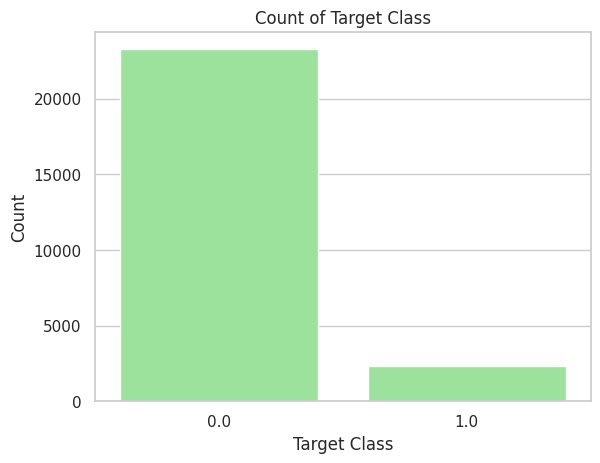

In [ ]:
sns.set_theme(style="whitegrid")

# Count the number of occurrences of each target class
target_class_counts = df_merged['target_class'].value_counts()

# Create a bar plot
sns.barplot(x=target_class_counts.index, y=target_class_counts.values, color='lightgreen')

# Add a title and labels
plt.title('Count of Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')

# Show the plot
plt.show()


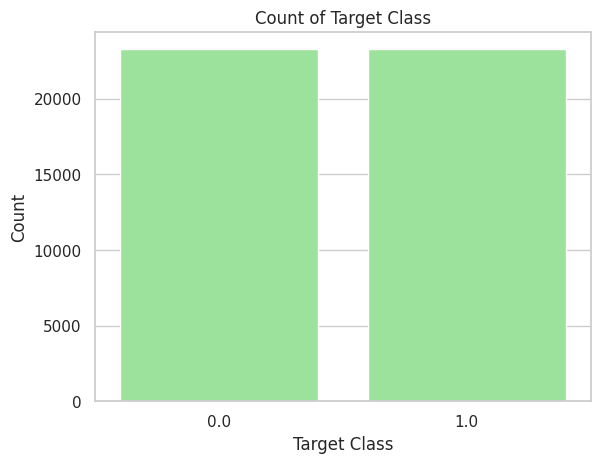

In [ ]:


# Separate majority and minority classes
majority = df_merged[df_merged['target_class'] == 0]
minority = df_merged[df_merged['target_class'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Combine majority and upsampled minority classes
df_balanced = pd.concat([majority, minority_upsampled])

# Shuffle the data
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Check the class distribution
sns.barplot(x=df_balanced['target_class'].value_counts().index, y=df_balanced['target_class'].value_counts().values, color='lightgreen')
plt.title('Count of Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


In [ ]:

print(df_balanced['target_class'].value_counts())


target_class
0.0    23262
1.0    23262
Name: count, dtype: int64


In [ ]:

df_balanced.fillna(df_balanced.mean(), inplace=True)

# Check for null values again
df_balanced.isnull().sum()


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [ ]:

# Get the column names without the target class
column_names = df_balanced.columns[:-1]

# Standardize the columns
scaler = StandardScaler()
df_balanced[column_names] = scaler.fit_transform(df_balanced[column_names])

# Check the standardized data
df_balanced.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
47107,1.755669,0.666148,-1.015186,-0.624392,-0.609440,-0.748224,0.198216,-0.139537,0.0
47640,-0.089255,0.779608,0.000000,-0.445234,2.301797,1.573884,-1.231132,-0.699551,1.0
8980,1.285520,0.799902,-0.921616,-0.662274,-0.554061,-0.448239,-0.031102,-0.333169,0.0
359,-0.543974,-0.872903,0.314169,0.158507,-0.340770,0.361183,-0.537891,-0.592552,1.0
8207,0.766472,0.027639,-0.568555,-0.553825,-0.460405,0.000526,-0.329627,-0.502944,1.0


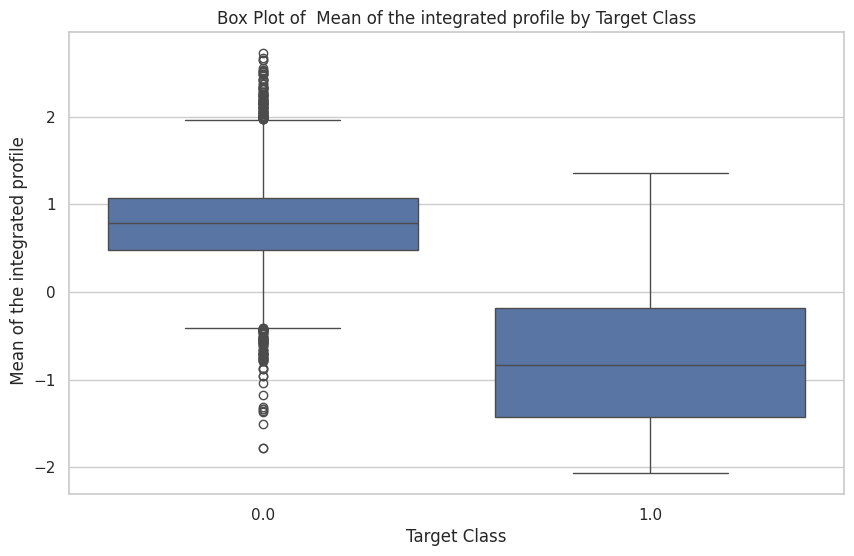

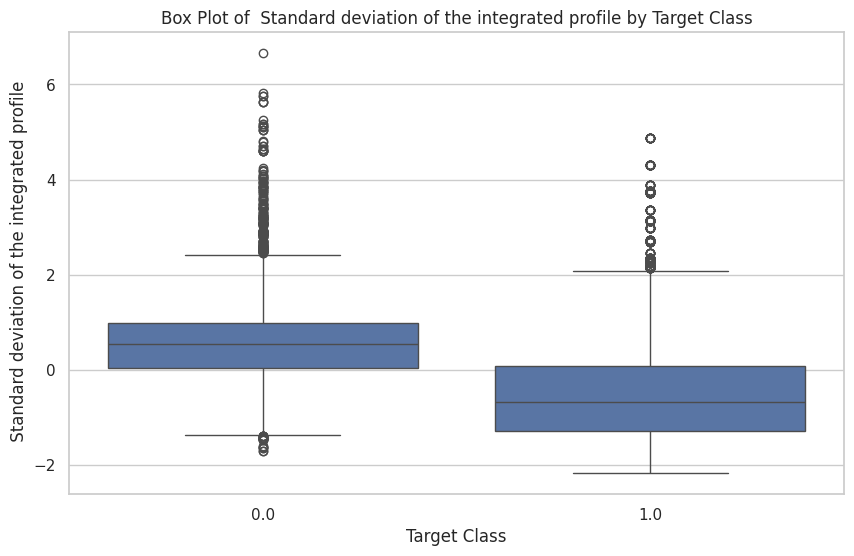

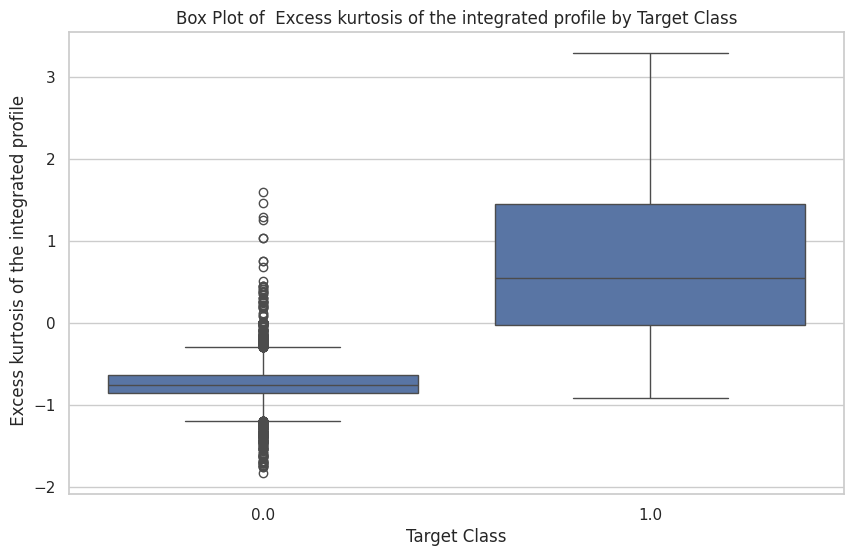

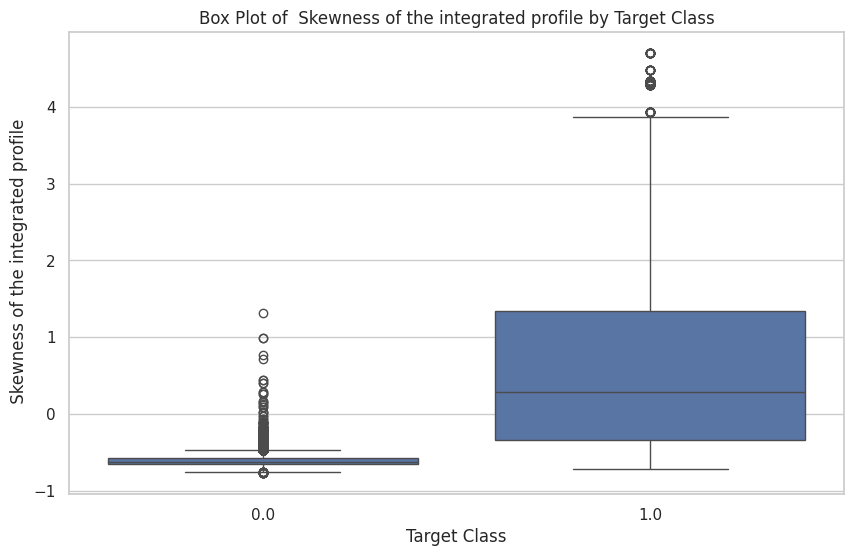

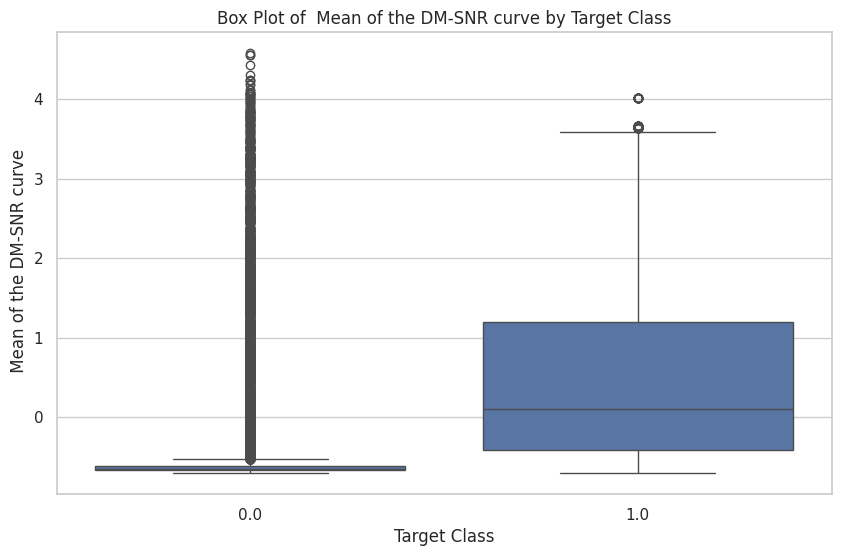

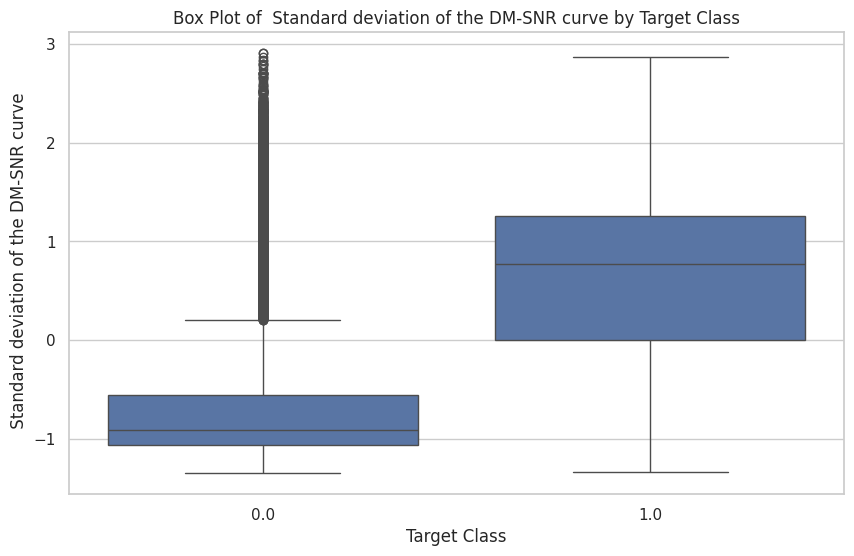

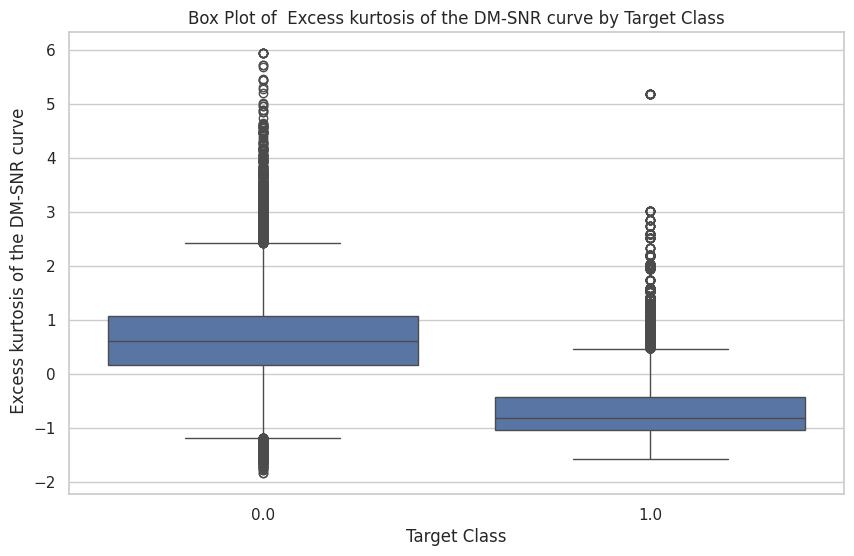

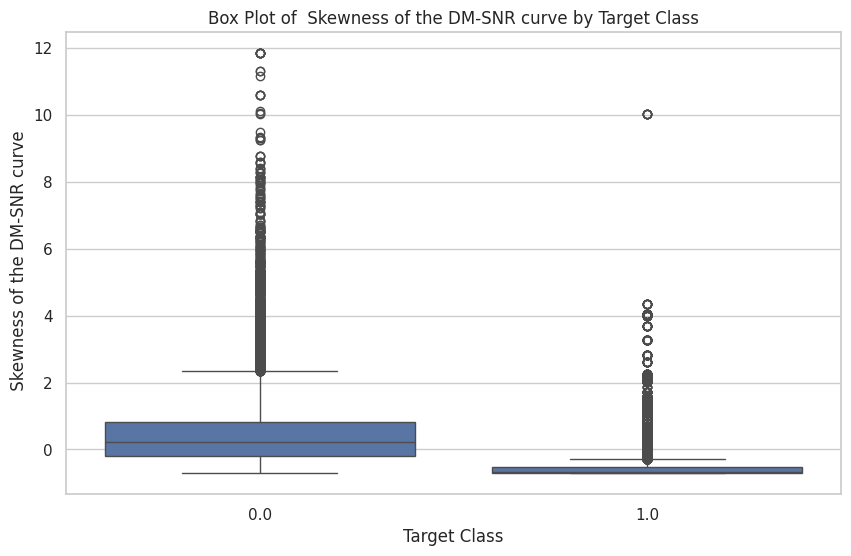

In [ ]:
features = df_balanced.columns[:-1]  # Exclude the target class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target_class', y=feature, data=df_balanced)
    plt.title(f'Box Plot of {feature} by Target Class')
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()


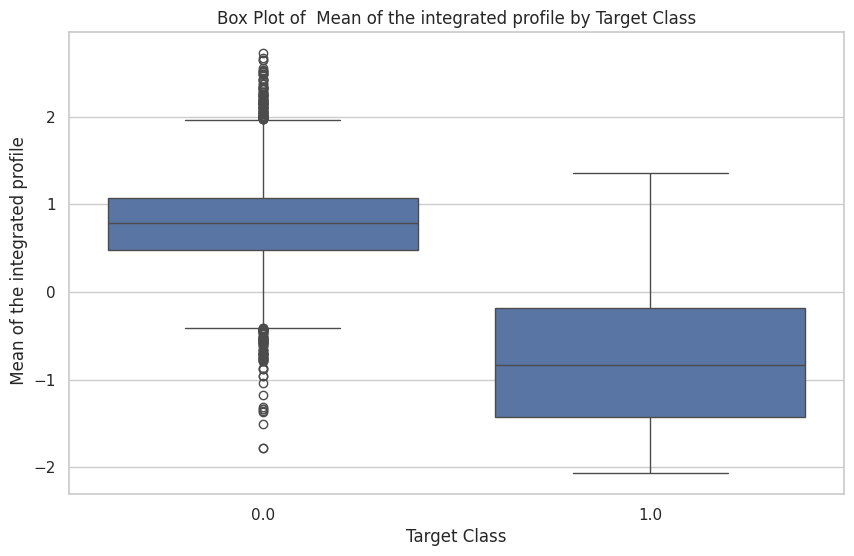

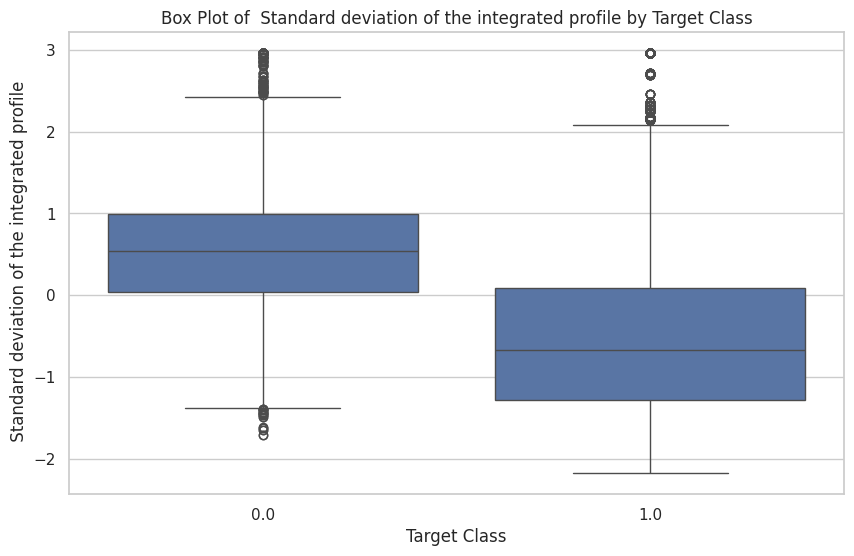

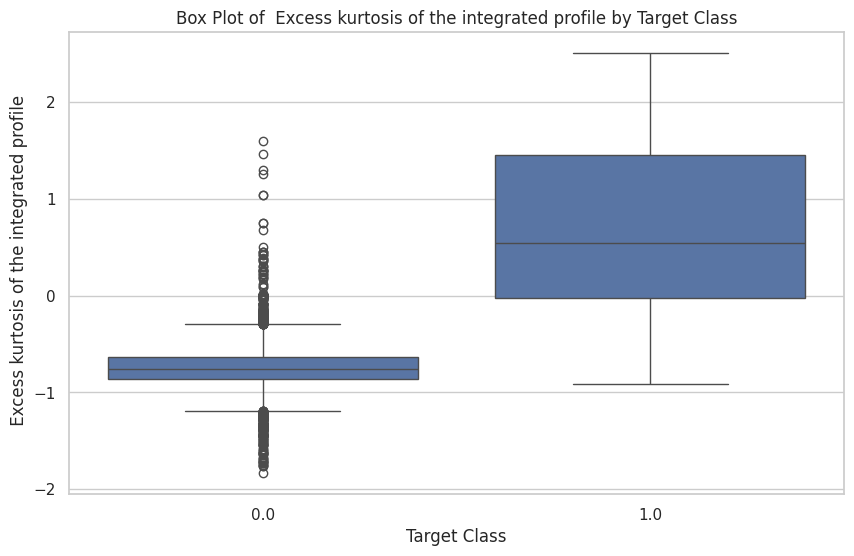

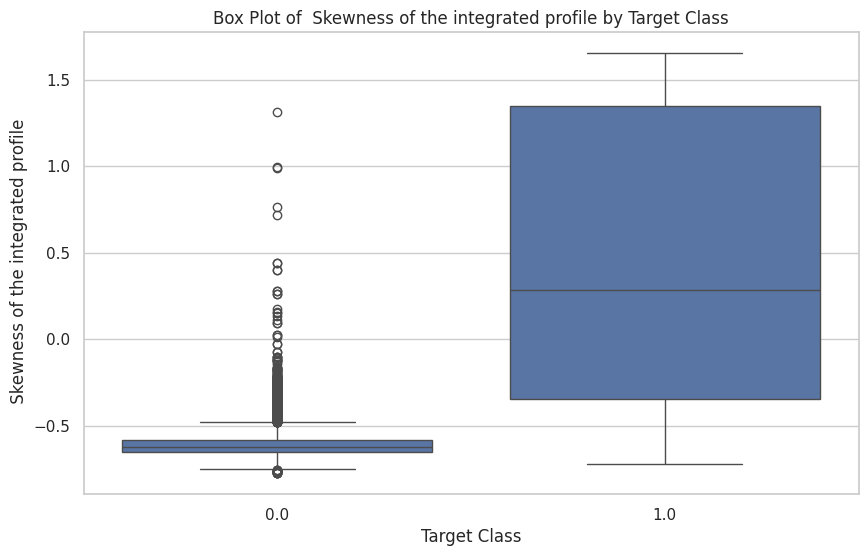

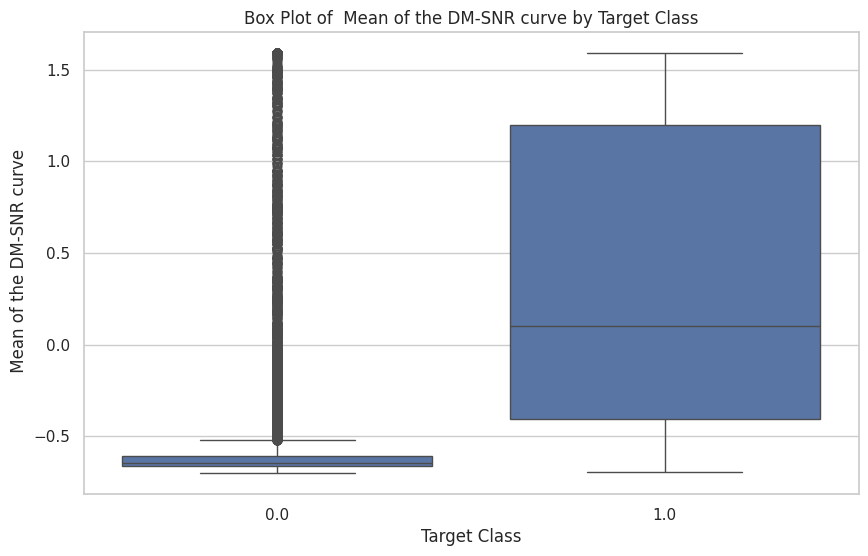

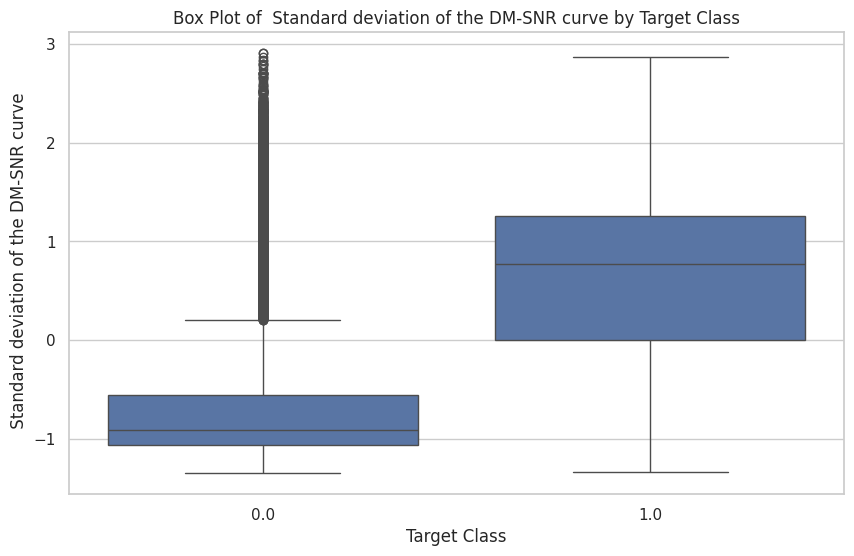

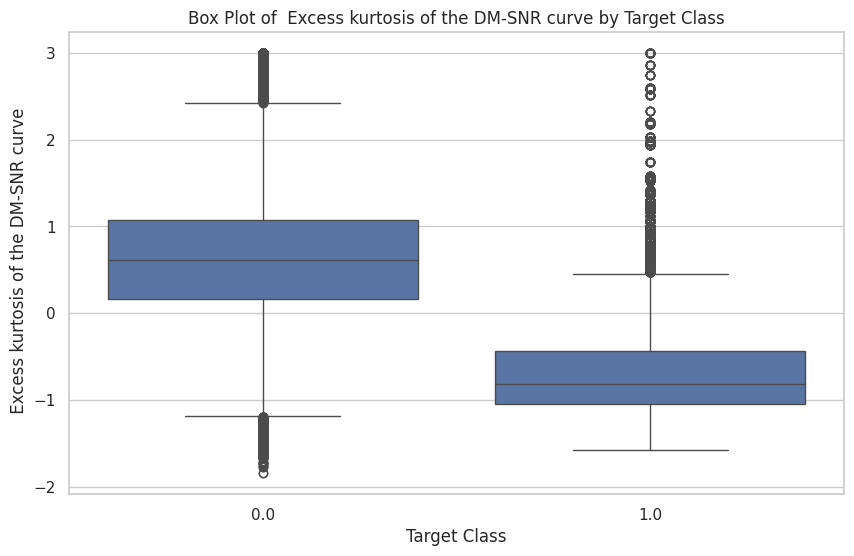

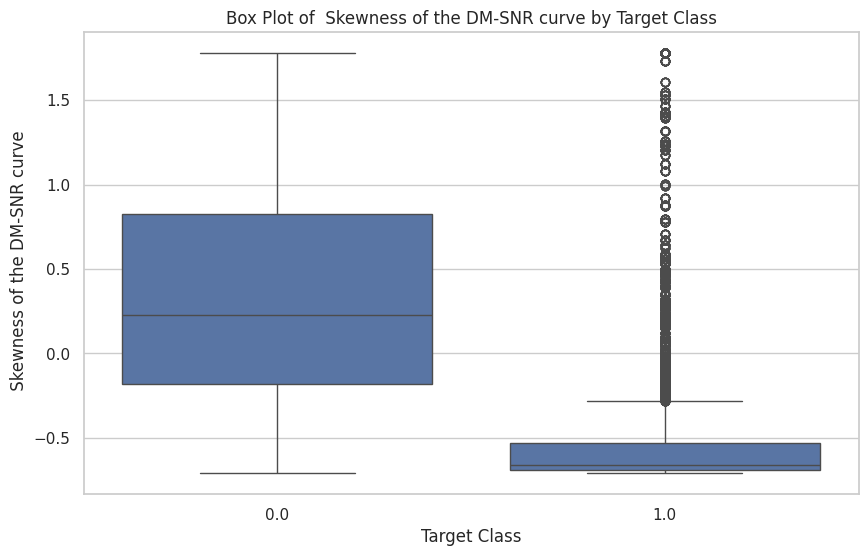

In [ ]:

import matplotlib.pyplot as plt
# Define the lower and upper limits for each feature based on the IQR method
Q1 = df_balanced[features].quantile(0.25)
Q3 = df_balanced[features].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip the outliers to the limits
for feature in features:
  df_balanced[feature] = df_balanced[feature].clip(lower=lower_limit[feature], upper=upper_limit[feature])

# Check for outliers again
for feature in features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='target_class', y=feature, data=df_balanced)
  plt.title(f'Box Plot of {feature} by Target Class')
  plt.xlabel('Target Class')
  plt.ylabel(feature)
  plt.show()


For a better data visualization we implement a violen plot:

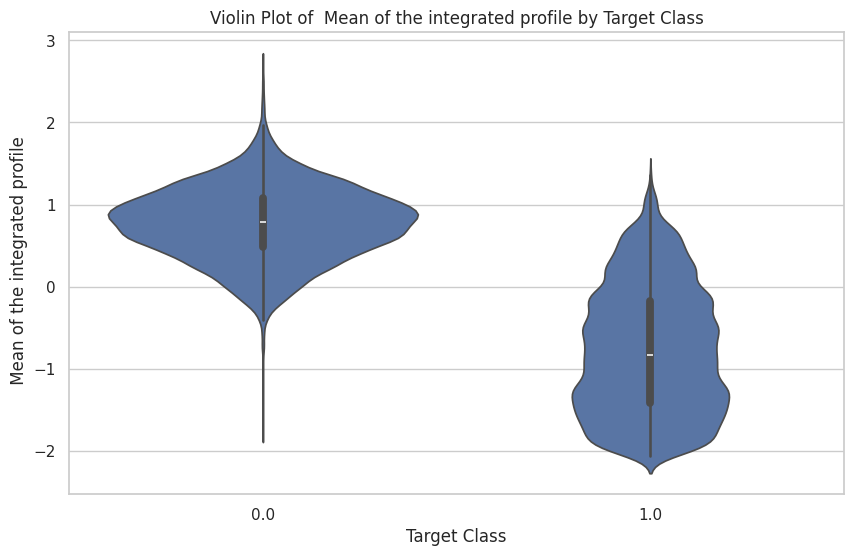

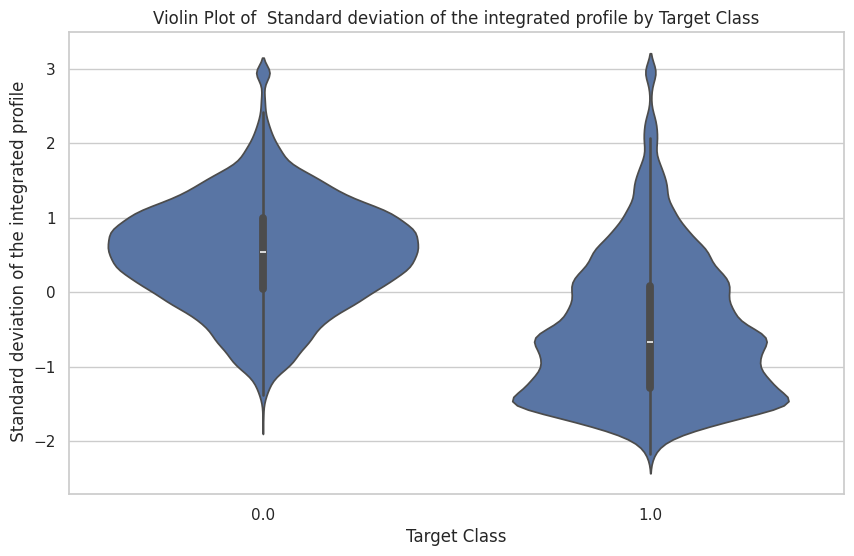

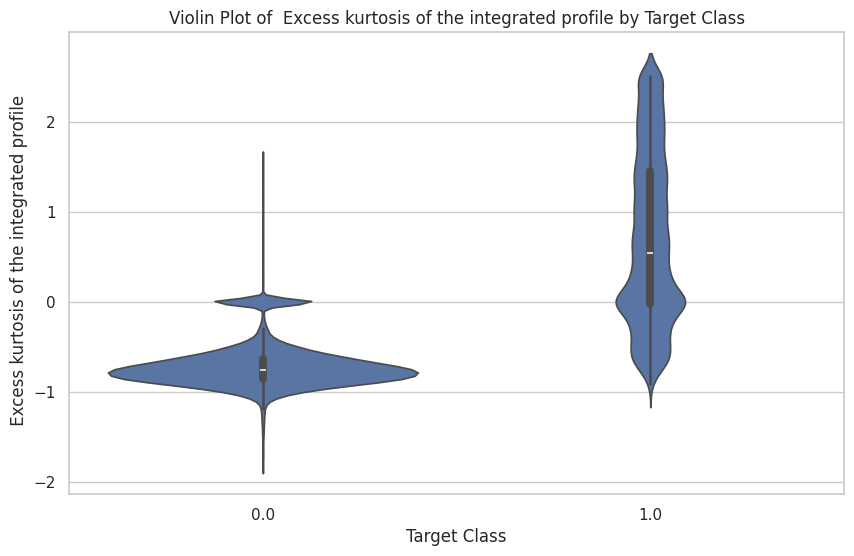

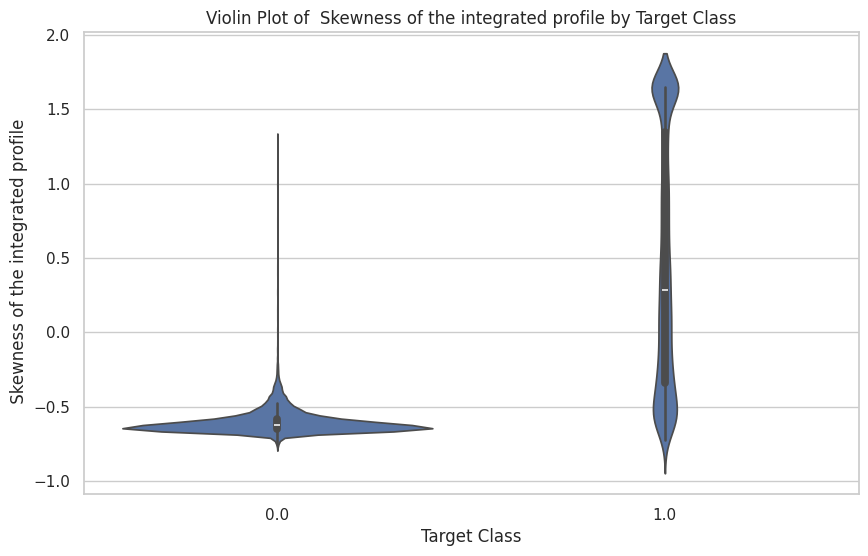

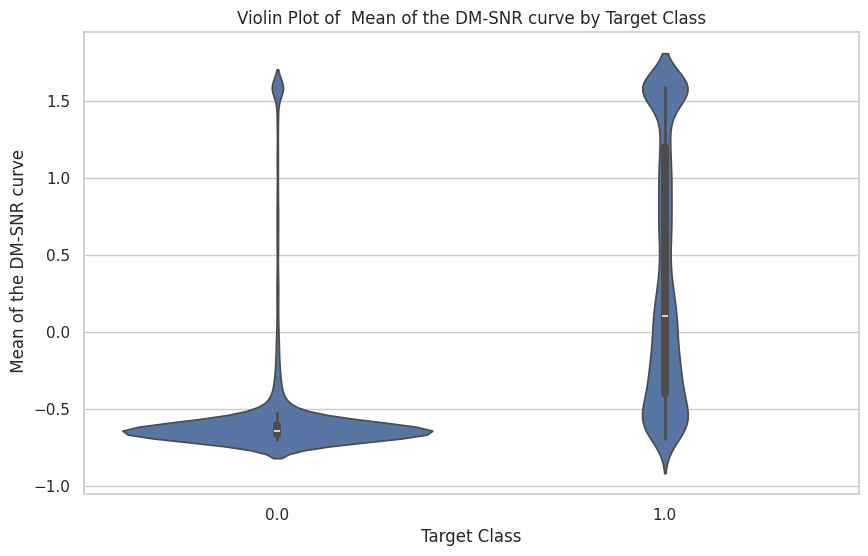

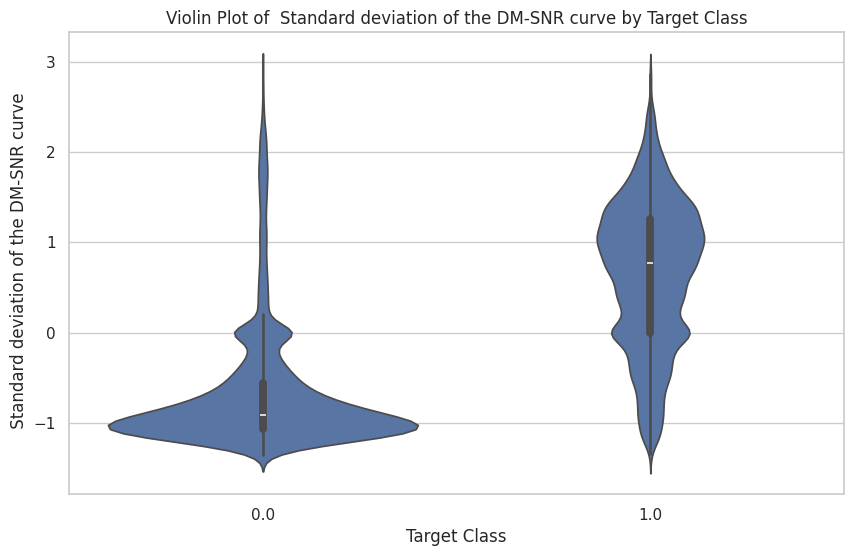

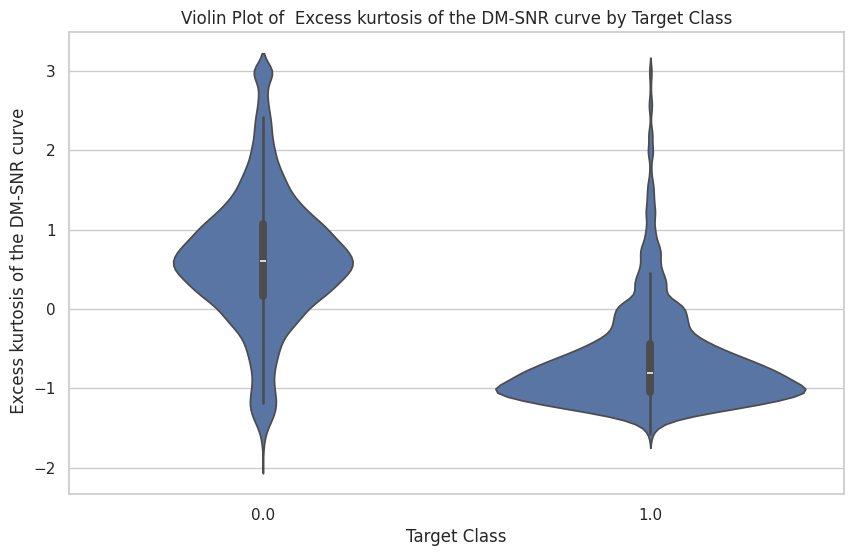

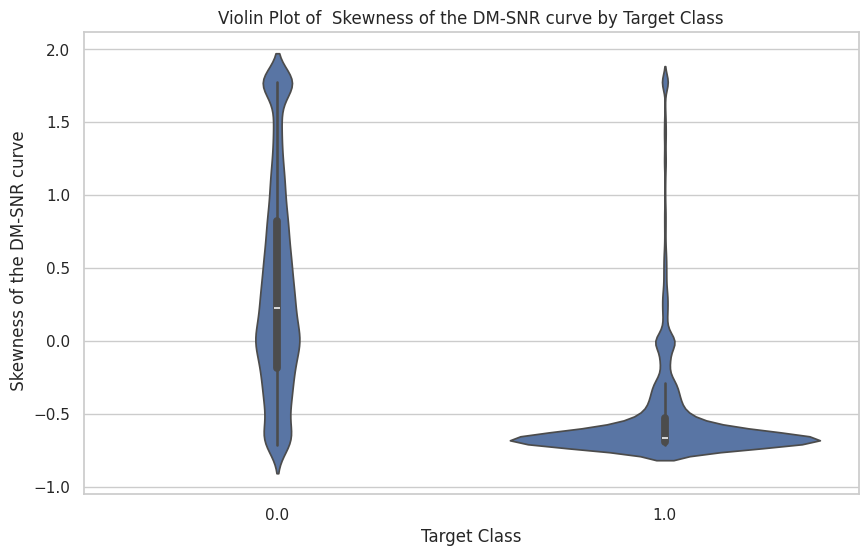

In [ ]:
#Violin plot, similar to box plot but shows the distribution.
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='target_class', y=feature, data=df_balanced)
    plt.title(f'Violin Plot of {feature} by Target Class')
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()


In [ ]:
len(df_balanced)

46524

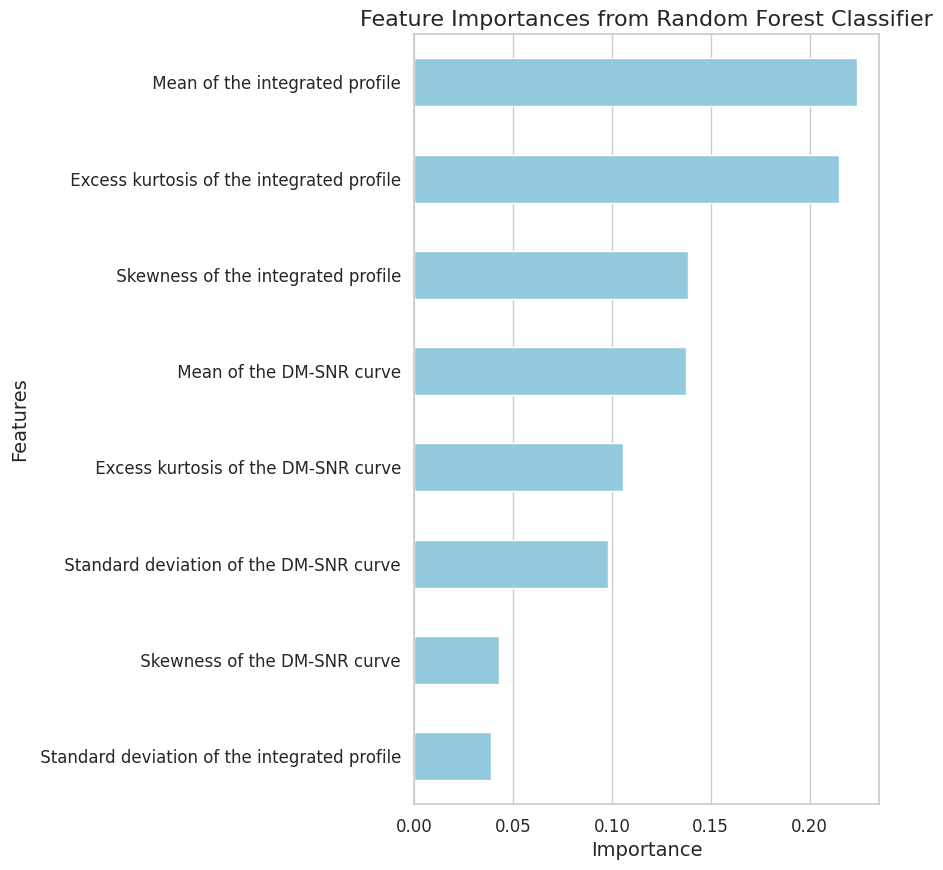

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier



# Define features
features = df_balanced.columns[:-1]

# Fit a RandomForest model to select important features
clf = RandomForestClassifier(n_estimators=100)
clf.fit(df_balanced[features], df_balanced['target_class'])

# Get feature importances from the RandomForest model
importances = clf.feature_importances_

# Create a DataFrame for plotting
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance for better visualization
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(6, 10)) # Changed figure size for vertical orientation
sns.barplot(y='Feature', x='Importance', data=feature_importances, color='skyblue', width=0.5) # Swapped x and y, added color and thinner bars
plt.title('Feature Importances from Random Forest Classifier', fontsize=16)
plt.ylabel('Features', fontsize=14) # Swapped x and y labels
plt.xlabel('Importance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

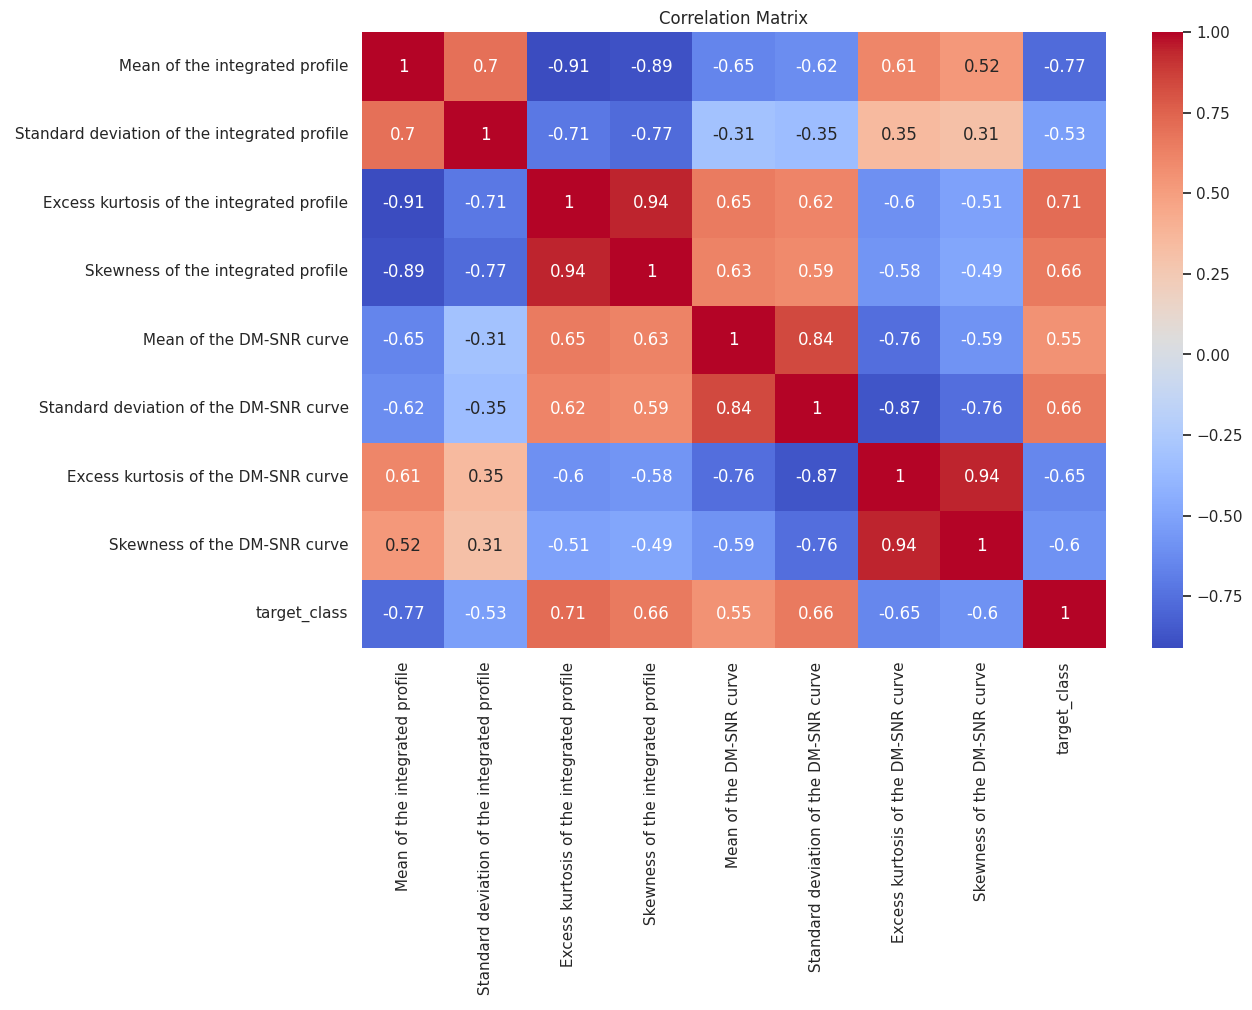

'\nPositive values indicate a positive linear relationship, where high values of one variable are associated with high values of another.\nNegative values indicate a negative linear relationship, where high values of one variable are associated with low values of another.\nValues close to 0 indicate a weak linear relationship.\n\nCheck Pearson Correlation Coefficient for details about the calculations\n'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = df_balanced.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix') #Shows the level of correlation between different features
plt.show()
'''
Positive values indicate a positive linear relationship, where high values of one variable are associated with high values of another.
Negative values indicate a negative linear relationship, where high values of one variable are associated with low values of another.
Values close to 0 indicate a weak linear relationship.

Check Pearson Correlation Coefficient for details about the calculations
'''

Removing the symmetric counterpart:

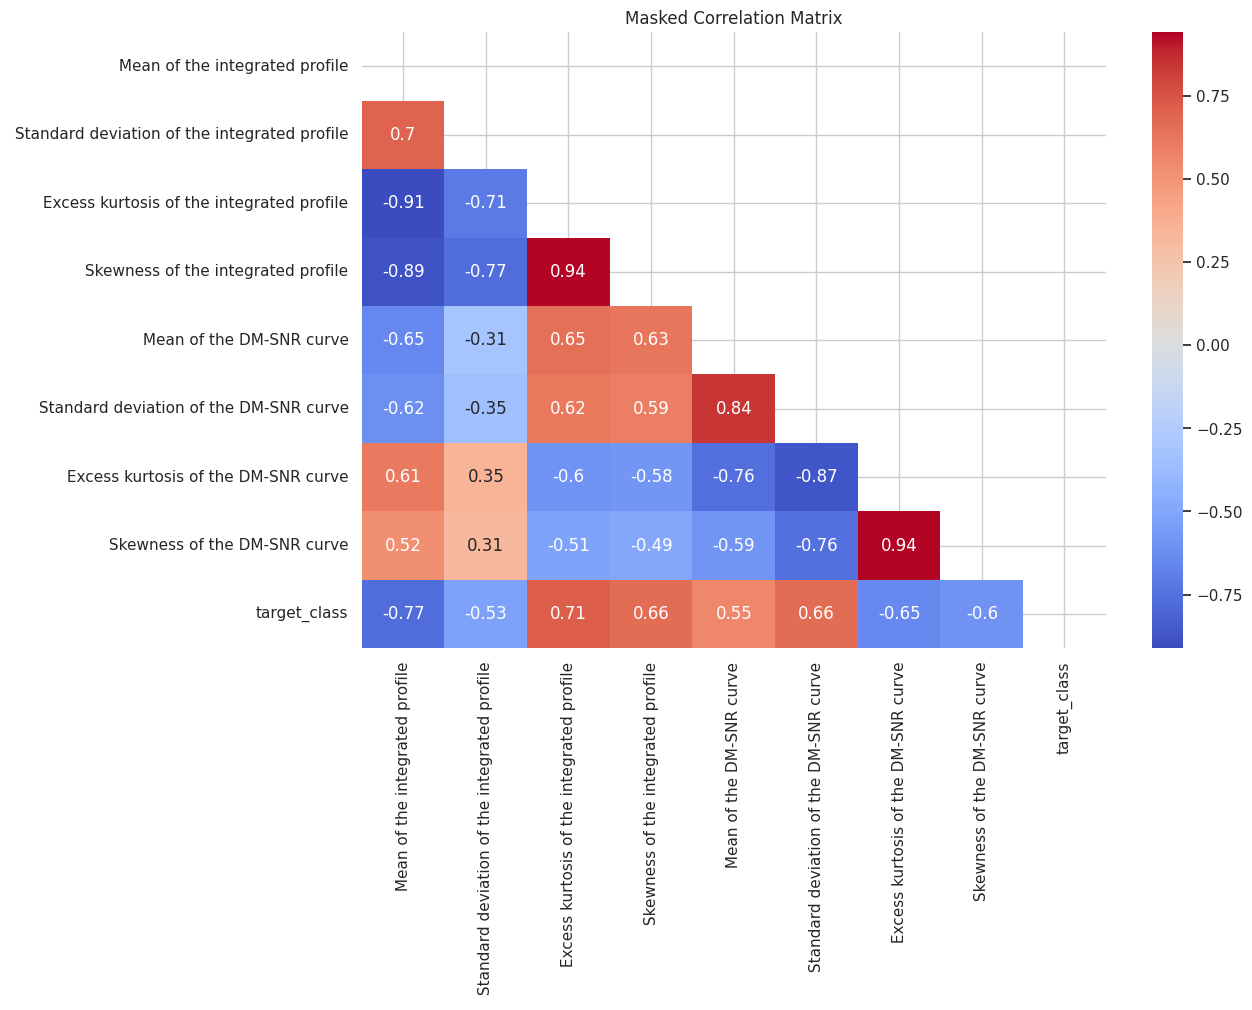

In [ ]:
import numpy as np

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangle of the correlation matrix to NaN
correlation_matrix_masked = correlation_matrix.mask(mask)

# Plot the masked correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_masked, annot=True, cmap='coolwarm')
plt.title('Masked Correlation Matrix')
plt.show()

Let's try implementing a random forest model to predict the presence of pulsars.

Training Accuracy:  0.9260453400503779
Test Accuracy: 0.9281151113499313
Test Report:
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      8423
         1.0       0.97      0.88      0.92      8326

    accuracy                           0.93     16749
   macro avg       0.93      0.93      0.93     16749
weighted avg       0.93      0.93      0.93     16749



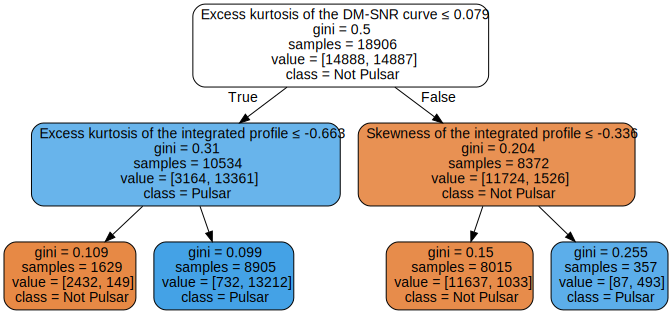

In [ ]:


# Split data into features and target
X = df_balanced.drop('target_class', axis=1)
y = df_balanced['target_class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=42)

# Train Random Forest model with max depth of 2
model = RandomForestClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

# Evaluate model on the test set
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Accuracy: ", model.score(X_train, y_train))
print("Test Accuracy:", test_accuracy)
print("Test Report:\n", test_report)

# Visualize one of the trees in the Random Forest
tree = model.estimators_[0]

# Export the tree structure to a dot file
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=['Not Pulsar', 'Pulsar'],
                           filled=True, rounded=True,
                           special_characters=True)

# Generate a graphical representation of the tree
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # Save the tree as a file
graph


The big difference between the precision of training and test pulsars data is not surprising, it is possibly due to the high number of duplications of class=pulsars that is being fed multiple times to train the model.
 Now let's try varying the hyperparameters and choose the combination that gives us the best predictions:

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import itertools



# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_balanced_imputed = pd.DataFrame(imputer.fit_transform(df_balanced), columns=df_balanced.columns)

# Split data into features and target
X = df_balanced_imputed.drop('target_class', axis=1)
y = df_balanced_imputed['target_class']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'n_estimators': [150],
    'min_samples_split': [7, 9, 14, 16],
    'min_samples_leaf': [1,2]
}

# Manual grid search over the validation set
best_score = 0
best_params = None
for max_depth, n_estimators, min_samples_split, min_samples_leaf in itertools.product(
    param_grid['max_depth'],
    param_grid['n_estimators'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf']
):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   random_state=42)
    model.fit(X_train, y_train)
    val_score = accuracy_score(y_val, model.predict(X_val))
    if val_score > best_score:
        best_score = val_score
        best_params = {
            'max_depth': max_depth,
            'n_estimators': n_estimators,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the final model on the training set with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Validation Report:\n", val_report)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Report:\n", test_report)


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 150, 'min_samples_split': 9, 'min_samples_leaf': 1}
Validation Accuracy: 0.9755203002388263
Validation Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      5848
         1.0       0.98      0.97      0.98      5876

    accuracy                           0.98     11724
   macro avg       0.98      0.98      0.98     11724
weighted avg       0.98      0.98      0.98     11724

Test Accuracy: 0.9737313432835821
Test Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2575
         1.0       0.98      0.96      0.97      2450

    accuracy                           0.97      5025
   macro avg       0.97      0.97      0.97      5025
weighted avg       0.97      0.97      0.97      5025



We obtained not only more accurate predictions, but a more balanced precisions between the classes.

USING RBMs to generate data similar to the data in the non-duplicated dataset

In [ ]:
df_balanced_noDups.to_excel("df_balanced_noDups.xlsx")